## Importing necessary modules

In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

## Importing testing and training datasets

In [22]:
url_test='https://raw.githubusercontent.com/Benny5969/Data-Science-Project/main/Test%20Data_2021.csv'
test = pd.read_csv(url_test)

url_train='https://raw.githubusercontent.com/Benny5969/Data-Science-Project/main/Training%20Data_2021.csv'
df=pd.read_csv(url_train)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.780,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.250,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.510,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,578064,1748,0.3044,0.000,0.0,0.0,0,20114,5574,77386,81647,282,48222,65360,148650,267601,1,1,1,3,4,98.702,9558.40,NaN,90.11,3219,8091,8091,30,8091,3802,missing,635,16.0833,0,0,11,3,4,0,missing,8.445,0.04348,13,0.48002,0,0,L,0
82996,578065,1846,NaN,0.000,0.0,0.0,793,18608,18608,63820,29187,missing,7863,67980,79280,missing,0,0,0,0,0,19.885,0.00,0.00,17.27,3207,2342,2342,1004,7969,missing,missing,949,21.3333,0,na,2,6,1,0,missing,missing,0,5,0.46925,na,0,L,0
82997,578066,1907,0.0381,0.000,0.0,0.0,2478,24775,24775,100294,88249,missing,2968,59767,99100,missing,0,0,0,0,0,9.967,NaN,NaN,3.54,2038,5049,5049,30386,5536,4076,5505,938,4.5833,0,na,14,8,0,0,137.164,42.857,0,19,0.67960,na,0,L,0
82998,578067,1744,1.8301,0.000,0.0,0.0,496,917,496,116164,2218,missing,656,4108,9910,missing,0,0,0,1,1,NaN,2552.63,2552.63,17.70,2488,5445,5445,760,6631,4806,missing,1880,1.5833,0,na,1,22,4,0,missing,missing,0.09375,3,0.45317,na,0,L,0


## Cleaning missing values

In [23]:
for i in range(1,47):
  df['mvar'+ str(i)] = df['mvar'+ str(i)].apply(pd.to_numeric, errors = 'coerce')
df.dtypes

application_key      int64
mvar1              float64
mvar2              float64
mvar3              float64
mvar4              float64
mvar5              float64
mvar6              float64
mvar7              float64
mvar8              float64
mvar9              float64
mvar10             float64
mvar11             float64
mvar12             float64
mvar13             float64
mvar14               int64
mvar15             float64
mvar16             float64
mvar17             float64
mvar18             float64
mvar19             float64
mvar20             float64
mvar21             float64
mvar22             float64
mvar23             float64
mvar24             float64
mvar25             float64
mvar26             float64
mvar27             float64
mvar28             float64
mvar29             float64
mvar30             float64
mvar31             float64
mvar32             float64
mvar33             float64
mvar34             float64
mvar35             float64
mvar36             float64
m

In [24]:
df['mvar47'].unique()

array(['C', 'L'], dtype=object)

In [25]:
df['mvar47'] = df['mvar47'].eq('L').mul(1)
df['mvar47']

0        0
1        1
2        0
3        1
4        1
        ..
82995    1
82996    1
82997    1
82998    1
82999    1
Name: mvar47, Length: 83000, dtype: int64

In [26]:
df.dtypes

application_key      int64
mvar1              float64
mvar2              float64
mvar3              float64
mvar4              float64
mvar5              float64
mvar6              float64
mvar7              float64
mvar8              float64
mvar9              float64
mvar10             float64
mvar11             float64
mvar12             float64
mvar13             float64
mvar14               int64
mvar15             float64
mvar16             float64
mvar17             float64
mvar18             float64
mvar19             float64
mvar20             float64
mvar21             float64
mvar22             float64
mvar23             float64
mvar24             float64
mvar25             float64
mvar26             float64
mvar27             float64
mvar28             float64
mvar29             float64
mvar30             float64
mvar31             float64
mvar32             float64
mvar33             float64
mvar34             float64
mvar35             float64
mvar36             float64
m

## Dealing with mising values

In [27]:
for column in df.columns:
  percentMissing = np.mean(df[column].isnull())
  if percentMissing > 0.5:
    print('{} -> {}%'.format(column,round(percentMissing*100)))

mvar11 -> 56%
mvar23 -> 51%
mvar31 -> 71%
mvar40 -> 78%
mvar41 -> 69%
mvar45 -> 55%


In [28]:
df.drop(['mvar11','mvar23','mvar45','mvar31','mvar40', 'mvar41'], axis=1,inplace=True)
df.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875,NaN,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613,NaN,0.0,0.0,0.0,0.0,0.0,74.25,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,NaN,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,3772.0,NaN,25.0833,0.0,NaN,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,0.0,0.0,84235,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,1308.0,2525.0,791.0,91.0,5992.0,NaN,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,1,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.51,796.67,28.72,801.0,2281.0,2281.0,487.0,2707.0,NaN,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,NaN,1,0


In [29]:
df.drop_duplicates() # No duplicates found

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875,NaN,1.0,1.0,1.0,3.0,3.0,94.780,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613,NaN,0.0,0.0,0.0,0.0,0.0,74.250,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,NaN,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,3772.0,NaN,25.0833,0.0,NaN,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,0.0,0.0,84235,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,1308.0,2525.0,791.0,91.0,5992.0,NaN,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,1,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.510,796.67,28.72,801.0,2281.0,2281.0,487.0,2707.0,NaN,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,578064,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,48222.0,65360.0,148650,267601.0,1.0,1.0,1.0,3.0,4.0,98.702,9558.40,90.11,3219.0,8091.0,8091.0,30.0,8091.0,3802.0,635.0,16.0833,0.0,0.0,11.0,3.0,4.0,0.0,0.04348,13.0,0.48002,0.0,1,0
82996,578065,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,7863.0,67980.0,79280,NaN,0.0,0.0,0.0,0.0,0.0,19.885,0.00,17.27,3207.0,2342.0,2342.0,1004.0,7969.0,NaN,949.0,21.3333,0.0,NaN,2.0,6.0,1.0,0.0,0.00000,5.0,0.46925,0.0,1,0
82997,578066,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,2968.0,59767.0,99100,NaN,0.0,0.0,0.0,0.0,0.0,9.967,NaN,3.54,2038.0,5049.0,5049.0,30386.0,5536.0,4076.0,938.0,4.5833,0.0,NaN,14.0,8.0,0.0,0.0,0.00000,19.0,0.67960,0.0,1,0
82998,578067,1744.0,1.8301,0.000,0.0,0.0,496.0,917.0,496.0,116164.0,2218.0,656.0,4108.0,9910,NaN,0.0,0.0,0.0,1.0,1.0,NaN,2552.63,17.70,2488.0,5445.0,5445.0,760.0,6631.0,4806.0,1880.0,1.5833,0.0,NaN,1.0,22.0,4.0,0.0,0.09375,3.0,0.45317,0.0,1,0


# Formatting Data
## Splitting data into dependent and Independent variables

In [30]:
X = df.drop(['default_ind','application_key'], axis=1).copy()
X.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875,NaN,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613,NaN,0.0,0.0,0.0,0.0,0.0,74.25,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,NaN,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,3772.0,NaN,25.0833,0.0,NaN,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,0.0,0.0,84235,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,1308.0,2525.0,791.0,91.0,5992.0,NaN,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,0.0,1
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.51,796.67,28.72,801.0,2281.0,2281.0,487.0,2707.0,NaN,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,NaN,1


In [31]:
y = df['default_ind'].copy()
y

0        0
1        1
2        1
3        0
4        0
        ..
82995    0
82996    0
82997    0
82998    0
82999    0
Name: default_ind, Length: 83000, dtype: int64

# Building XGBoost Model

In [32]:
(sum(y)/len(y))*100

28.740963855421686

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [34]:
(sum(y_train)/len(y_train))*100

28.74056224899598

In [35]:
(sum(y_test)/len(y_test))*100

28.742168674698792

In [36]:
model = xgb.XGBClassifier(objective='binary:logistic', 
                              n_estimators= 200,
                              max_depth=6,
                              colsample_bylevel=0.4,
                              colsample_bytree=0.6,
                              learning_rate=0.05,
                              scale_pos_weight=1.78,
                              min_child_weight=1.5,
                              random_state=6
                              )
model.fit(X_train,
              y_train,
              verbose=True,
              early_stopping_rounds=20,
              eval_metric='aucpr',
              eval_set=[(X_test,y_test)]) 

[0]	validation_0-aucpr:0.55389
Will train until validation_0-aucpr hasn't improved in 20 rounds.
[1]	validation_0-aucpr:0.579854
[2]	validation_0-aucpr:0.58533
[3]	validation_0-aucpr:0.590292
[4]	validation_0-aucpr:0.590934
[5]	validation_0-aucpr:0.594079
[6]	validation_0-aucpr:0.597311
[7]	validation_0-aucpr:0.598496
[8]	validation_0-aucpr:0.599253
[9]	validation_0-aucpr:0.600849
[10]	validation_0-aucpr:0.601544
[11]	validation_0-aucpr:0.601451
[12]	validation_0-aucpr:0.601962
[13]	validation_0-aucpr:0.603171
[14]	validation_0-aucpr:0.604151
[15]	validation_0-aucpr:0.60524
[16]	validation_0-aucpr:0.605293
[17]	validation_0-aucpr:0.606705
[18]	validation_0-aucpr:0.607345
[19]	validation_0-aucpr:0.607726
[20]	validation_0-aucpr:0.607972
[21]	validation_0-aucpr:0.608873
[22]	validation_0-aucpr:0.609308
[23]	validation_0-aucpr:0.609811
[24]	validation_0-aucpr:0.610596
[25]	validation_0-aucpr:0.610972
[26]	validation_0-aucpr:0.610884
[27]	validation_0-aucpr:0.611336
[28]	validation_0-aucpr

XGBClassifier(colsample_bylevel=0.4, colsample_bytree=0.6, learning_rate=0.05,
              max_depth=6, min_child_weight=1.5, n_estimators=200,
              random_state=6, scale_pos_weight=1.78)

Model Summary

In [37]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 0.4,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1.5,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 6,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1.78,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


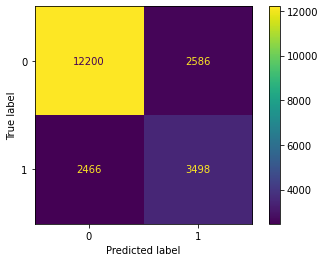

In [38]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format='d')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


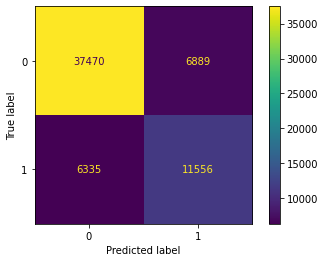

In [39]:
plot_confusion_matrix(model,
                      X_train,
                      y_train,
                      values_format='d')

In [40]:
from sklearn import metrics
predicted_y = model.predict(X_test)
predicted_train_y = model.predict(X_train)
expected_y = y_test
print('Testing data \n',metrics.classification_report(expected_y, predicted_y))
print('Training data \n',metrics.classification_report(y_train, predicted_train_y))

Testing data 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     14786
           1       0.57      0.59      0.58      5964

    accuracy                           0.76     20750
   macro avg       0.70      0.71      0.70     20750
weighted avg       0.76      0.76      0.76     20750

Training data 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     44359
           1       0.63      0.65      0.64     17891

    accuracy                           0.79     62250
   macro avg       0.74      0.75      0.74     62250
weighted avg       0.79      0.79      0.79     62250



In [41]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

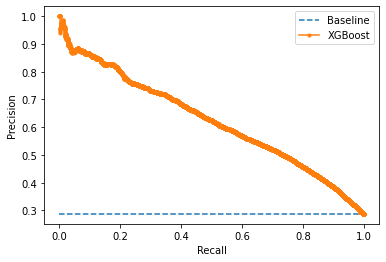

In [42]:
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
no_skill = len(y[y==1]) / len(y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
pyplot.plot(recall, precision, marker='.', label='XGBoost')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [43]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params={'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 0.4,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1.5,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'objective': 'binary:logistic',
 'random_state': 6,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1.78,
 'subsample': 1,
 'verbosity': 1}

In [44]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

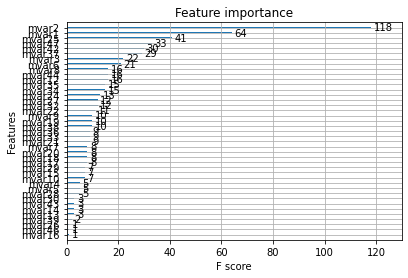

In [45]:
xgb.plot_importance(xg_reg)
pyplot.rcParams['figure.figsize'] = [7.5, 15]
pyplot.show()

# Output

In [46]:
for i in range(1,47):
  test['mvar'+ str(i)] = test['mvar'+ str(i)].apply(pd.to_numeric, errors = 'coerce')
test.drop(['application_key','mvar11','mvar23','mvar45','mvar31','mvar40', 'mvar41'], axis=1,inplace=True)

In [47]:
test.dtypes

mvar1     float64
mvar2     float64
mvar3     float64
mvar4     float64
mvar5     float64
mvar6     float64
mvar7     float64
mvar8     float64
mvar9     float64
mvar10    float64
mvar12    float64
mvar13    float64
mvar14      int64
mvar15    float64
mvar16    float64
mvar17    float64
mvar18    float64
mvar19    float64
mvar20    float64
mvar21    float64
mvar22    float64
mvar24    float64
mvar25    float64
mvar26    float64
mvar27    float64
mvar28    float64
mvar29    float64
mvar30    float64
mvar32    float64
mvar33    float64
mvar34    float64
mvar35    float64
mvar36    float64
mvar37    float64
mvar38    float64
mvar39    float64
mvar42    float64
mvar43    float64
mvar44    float64
mvar46    float64
mvar47     object
dtype: object

In [48]:
test

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47
0,1719.0,0.6174,8.623,0.000,0.000,258.0,258.0,258.0,10729.0,307.0,40.0,0.0,49550,83387.0,0.0,0.0,0.0,0.0,1.0,NaN,6125.00,13.33,1399.0,1734.0,122.0,0.0,3650.0,3437.0,184.0,5.1667,0.0,0.0,3.0,3.0,2.0,0.0,0.54545,2.0,0.91837,0.0,C
1,1795.0,0.2051,0.000,0.000,0.000,1685.0,12711.0,8913.0,80519.0,18099.0,3457.0,455.0,198200,458833.0,0.0,0.0,0.0,0.0,0.0,25.050,2385.71,0.00,1440.0,2464.0,2220.0,760.0,7330.0,2525.0,852.0,3.0833,0.0,0.0,2.0,13.0,4.0,0.0,0.17241,4.0,0.94563,0.0,C
2,1742.0,0.5082,0.000,0.000,0.000,1185.0,8954.0,8954.0,1189.0,1185.0,3028.0,1453.0,122884,NaN,0.0,0.0,0.0,0.0,0.0,20.340,33.33,0.33,2716.0,5384.0,5384.0,669.0,14478.0,3711.0,625.0,0.5833,0.0,0.0,1.0,3.0,1.0,0.0,0.64706,1.0,0.97054,0.0,C
3,1685.0,0.2595,25.409,0.000,0.000,NaN,3354.0,NaN,NaN,3354.0,NaN,NaN,118920,375589.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2373.0,NaN,NaN,0.4167,0.0,NaN,6.0,NaN,2.0,0.0,0.85714,1.0,1.00000,0.0,C
4,1666.0,1.2678,0.000,0.000,0.000,570.0,570.0,570.0,NaN,570.0,74.0,NaN,42613,NaN,0.0,0.0,0.0,0.0,0.0,11.538,1153.85,NaN,0.0,0.0,0.0,0.0,1551.0,30.0,0.0,0.1667,0.0,0.0,1.0,0.0,2.0,0.0,NaN,0.0,0.99617,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,1736.0,2.1740,0.000,0.000,0.000,11.0,4248.0,1577.0,13379.0,6671.0,11791.0,9768.0,247750,NaN,0.0,0.0,0.0,2.0,2.0,88.130,8813.33,88.13,304.0,487.0,487.0,30386.0,487.0,487.0,20.0,0.2500,0.0,0.0,4.0,0.0,4.0,0.0,0.00000,4.0,0.43829,0.0,C
46996,1724.0,0.0000,1.108,0.768,0.000,NaN,64041.0,NaN,10926.0,84839.0,2310.0,3222.0,77298,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,22.68,624.0,2798.0,NaN,335.0,6965.0,4045.0,41.0,6.4167,0.0,NaN,5.0,2.0,5.0,0.0,0.16667,14.0,0.57931,0.0,C
46997,1605.0,0.2901,11.561,0.937,2.976,NaN,2277.0,NaN,3964.0,5709.0,269.0,2619.0,11892,NaN,NaN,NaN,NaN,0.0,0.0,54.200,NaN,40.90,953.0,1308.0,1308.0,0.0,1308.0,426.0,94.0,3.5833,2.0,NaN,7.0,0.0,5.0,2.0,0.50000,4.0,0.42069,0.0,C
46998,1780.0,1.1874,0.000,0.000,0.000,0.0,6356.0,4802.0,3206.0,18180.0,2665.0,12343.0,84235,NaN,1.0,1.0,1.0,1.0,1.0,35.850,3163.53,67.83,236.0,608.0,608.0,973.0,3924.0,2038.0,31.0,2.5833,0.0,0.0,5.0,0.0,8.0,0.0,0.06061,9.0,0.53251,0.0,L


In [49]:
test['mvar47'] = test['mvar47'].eq('L').mul(1)
test['mvar47']

0        0
1        0
2        0
3        0
4        1
        ..
46995    0
46996    0
46997    0
46998    1
46999    0
Name: mvar47, Length: 47000, dtype: int64

In [50]:
y_final_predicted = model.predict(test)

In [51]:
n_ones = sum(y_final_predicted)
print("Number of 1s in my output : ", n_ones)

Number of 1s in my output :  14594


In [52]:
test0 = pd.read_csv(url_test)
output=pd.concat([test0['application_key'],pd.DataFrame(y_final_predicted)],axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
output.columns=['application_key','default_ind']
output

,application_key,default_ind
0,578069,0
1,578070,0
2,578071,0
3,578072,1
4,578073,0
...,...,...
46995,310027,1
46996,310028,0
46997,310029,1
46998,310030,0


In [ ]:
output.to_csv('Group13_15.csv',index=False, header=False)
from google.colab import files
files.download('Group13_15.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>